In [1]:
"""
Making neccesary imports 
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import scipy
from scipy.io import arff

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [2]:
"""
Reading the .arff files for phone accel sensor and storing them in a dataframe.
"""

phone_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/accel')
filenames.pop(6)

for file in filenames:
    path = "wisdm-dataset/arff_files/phone/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_accel_df]
    phone_accel_df = pd.concat(frames, sort = False)

"""
Setting data options
"""
print("Shape of data: ", phone_accel_df.shape)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
phone_accel_df.describe()

for file at wisdm-dataset/arff_files/phone/accel/data_1611_accel_phone.arffshape is: (404, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1630_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1641_accel_phone.arffshape is: (803, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1624_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1605_accel_phone.arffshape is: (406, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1601_accel_phone.arffshape is: (407, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1645_accel_phone.arffshape is: (803, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1620_accel_phone.arffshape is: (555, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1634_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1615_accel_phone.arffshape is: (404, 93)
for file at wisdm-dataset/arff_files/phone/accel/d

,"""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""Y0""","""Y1""","""Y2""","""Y3""","""Y4""","""Y5""","""Y6""","""Y7""","""Y8""","""Y9""","""Z0""","""Z1""","""Z2""","""Z3""","""Z4""","""Z5""","""Z6""","""Z7""","""Z8""","""Z9""","""XAVG""","""YAVG""","""ZAVG""","""XPEAK""","""YPEAK""","""ZPEAK""","""XABSOLDEV""","""YABSOLDEV""","""ZABSOLDEV""","""XSTANDDEV""","""YSTANDDEV""","""ZSTANDDEV""","""XVAR""","""YVAR""","""ZVAR""","""XMFCC0""","""XMFCC1""","""XMFCC2""","""XMFCC3""","""XMFCC4""","""XMFCC5""","""XMFCC6""","""XMFCC7""","""XMFCC8""","""XMFCC9""","""XMFCC10""","""XMFCC11""","""XMFCC12""","""YMFCC0""","""YMFCC1""","""YMFCC2""","""YMFCC3""","""YMFCC4""","""YMFCC5""","""YMFCC6""","""YMFCC7""","""YMFCC8""","""YMFCC9""","""YMFCC10""","""YMFCC11""","""YMFCC12""","""ZMFCC0""","""ZMFCC1""","""ZMFCC2""","""ZMFCC3""","""ZMFCC4""","""ZMFCC5""","""ZMFCC6""","""ZMFCC7""","""ZMFCC8""","""ZMFCC9""","""ZMFCC10""","""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT"""
count,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000
mean,0.286300,0.174766,0.153323,0.127511,0.113369,0.122740,0.011498,0.004455,0.002360,0.003677,0.444564,0.160766,0.108104,0.081655,0.047574,0.116734,0.025588,0.006439,0.003615,0.004960,0.267592,0.241034,0.187288,0.117798,0.092283,0.087346,0.003055,0.001425,0.000857,0.001323,0.635941,-1.222940,0.237969,49.482422,48.574631,44.100662,1.032010,1.094064,0.952755,0.095627,0.099844,0.090961,0.233516,0.231194,0.231338,0.284676,0.402377,0.401731,0.400654,0.399149,0.397216,0.394857,0.392076,0.388875,0.385257,0.381227,0.376789,0.371947,0.276331,0.390582,0.389955,0.388910,0.387448,0.385572,0.383283,0.380583,0.377476,0.373964,0.370052,0.365744,0.361044,0.272830,0.385634,0.385014,0.383983,0.382540,0.380687,0.378427,0.375761,0.372693,0.369226,0.365364,0.361110,0.356470,0.077872,-0.034613,0.123174,-0.037359,0.026912,-0.007542,10.095703
std,0.408534,0.296568,0.268249,0.271586,0.276431,0.300808,0.048297,0.019449,0.010885,0.021607,0.465237,0.325068,0.274509,0.243585,0.168535,0.277425,0.078746,0.023216,0.014684,0.024945,0.379247,0.323172,0.286859,0.259943,0.255854,0.266755,0.011948,0.005944,0.004175,0.008752,5.371801,6.412525,4.433881,16.058773,15.317661,12.033639,1.660467,1.916945,1.374184,0.150227,0.166625,0.130206,0.202729,0.215395,0.193509,0.128939,0.182249,0.181957,0.181469,0.180787,0.179912,0.178843,0.177584,0.176134,0.174495,0.172670,0.170660,0.168467,0.158076,0.223433,0.223074,0.222476,0.221640,0.220567,0.219257,0.217713,0.215935,0.213926,0.211689,0.209224,0.206536,0.132388,0.187124,0.186824,0.186323,0.185623,0.184724,0.183627,0.182334,0.180845,0.179163,0.177289,0.175225,0.172973,0.839202,0.798469,0.804191,0.409485,0.431765,0.389613,1.143357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [3]:
"""
Reading the .arff files for phone gyro sensor and storing them in a dataframe.
"""

# phone_gyro_df = pd.DataFrame()
# filenames = os.listdir('wisdm-dataset/arff_files/phone/gyro')
# filenames.pop(0)
# for file in filenames:
#     path = "wisdm-dataset/arff_files/phone/gyro/" + file
#     data = arff.loadarff(path)
#     df = pd.DataFrame(data[0])
#     print("for file at " + path + "shape is: " + str(df.shape))
#     frames = [df, phone_accel_df]
#     phone_accel_df = pd.concat(frames, sort = False)

# """
# Setting data options
# """
# print("Shape of data: ", phone_accel_df.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# phone_accel_df.describe()

'\nReading the .arff files for phone gyro sensor and storing them in a dataframe.\n'

In [4]:
"""
Reading the .arff files for watch accel sensor and storing them in a dataframe.
"""

# watch_accel_df = pd.DataFrame()
# filenames = os.listdir('wisdm-dataset/arff_files/watch/accel')
# filenames.pop(0)
# for file in filenames:
#     path = "wisdm-dataset/arff_files/watch/accel/" + file
#     data = arff.loadarff(path)
#     df = pd.DataFrame(data[0])
#     print("for file at " + path + "shape is: " + str(df.shape))
#     frames = [df, watch_accel_df]
#     watch_accel_df = pd.concat(frames, sort = False)
    
# print(watch_accel_df.shape)

# """
# Setting data options
# """
# print("Shape of data: ", phone_accel_df.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# phone_accel_df.describe()

'\nReading the .arff files for watch accel sensor and storing them in a dataframe.\n'

In [5]:
"""
Reading the .arff files for watch gyro sensor and storing them in a dataframe.
"""

# watch_gyro_df = pd.DataFrame()
# filenames = os.listdir('wisdm-dataset/arff_files/watch/gyro')
# filenames.pop(0)
# for file in filenames:
#     path = "wisdm-dataset/arff_files/watch/gyro/" + file
#     data = arff.loadarff(path)
#     df = pd.DataFrame(data[0])
#     print("for file at " + path + "shape is: " + str(df.shape))
#     frames = [df, watch_gyro_df]
#     watch_gyro_df = pd.concat(frames, sort = False)
    
# print(watch_gyro_df.shape)

# """
# Setting data options
# """
# print("Shape of data: ", phone_accel_df.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# phone_accel_df.describe()

'\nReading the .arff files for watch gyro sensor and storing them in a dataframe.\n'

In [6]:
"""
Combining all data into one dataframe
"""

# database = pd.DataFrame()
# frames_to_merge = [phone_gyro_df, phone_accel_df, watch_gyro_df, watch_accel_df]
# database = pd.concat(frames_to_merge, sort = False)
# database.shape
# database.head()
# database.info()

'\nCombining all data into one dataframe\n'

In [7]:
"""
Data preprocessing to remove spaces in column names and remove patient ID
"""
selection = phone_accel_df
old_column_names = selection.columns
new_column_names = []
for name in old_column_names:
    new_column_names.append(name.replace('"', ''))

replacement_dict = dict(zip(old_column_names, new_column_names))
database = phone_accel_df.rename(columns = replacement_dict)
labelencoder = LabelEncoder()
database['ACTIVITY'] = labelencoder.fit_transform(database['ACTIVITY'])
database['ACTIVITY'].unique()
database.pop('class')

database_shuffle = shuffle(database)
database_shuffle.head(20)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
525,12,0.060,0.440,0.450,0.045,0.005,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.740,0.220,0.035,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.022354,-9.238370,-3.382560,65.0000,64.0000,50.0000,1.249520,0.754437,1.430140,0.116022,0.074189,0.151440,0.340620,0.272376,0.389153,0.289729,0.409520,0.408862,0.407766,0.406234,0.404266,0.401866,0.399035,0.395777,0.392096,0.387994,0.383477,0.378549,0.362564,0.512469,0.511646,0.510274,0.508357,0.505895,0.502891,0.499349,0.495272,0.490665,0.485532,0.479880,0.473713,0.367632,0.519632,0.518798,0.517407,0.515463,0.512967,0.509921,0.506329,0.502195,0.497524,0.492319,0.486588,0.480335,-0.037445,0.067573,0.822516,-0.211898,0.147848,-0.281207,10.17730
29,1,0.100,0.115,0.100,0.150,0.105,0.095,0.080,0.115,0.075,0.065,0.225,0.085,0.110,0.100,0.055,0.065,0.065,0.080,0.080,0.135,0.320,0.150,0.205,0.150,0.090,0.025,0.015,0.010,0.015,0.020,6.315620,5.709140,-0.161829,58.4848,63.2258,33.9286,6.089790,7.707600,5.083910,0.515187,0.623854,0.487054,0.717766,0.789845,0.697892,0.511817,0.723431,0.722269,0.720334,0.717627,0.714151,0.709911,0.704911,0.699155,0.692652,0.685406,0.677426,0.668721,0.508421,0.718631,0.717476,0.715553,0.712864,0.709412,0.705200,0.700233,0.694516,0.688055,0.680857,0.672931,0.664284,0.542190,0.766362,0.765131,0.763080,0.760213,0.756531,0.752039,0.746742,0.740645,0.733756,0.726080,0.717627,0.708405,0.793341,-0.100665,-0.366159,0.689629,-0.112891,-0.421053,13.54710
180,10,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-7.348200,-6.477400,-1.944380,34.8214,35.0909,40.8511,0.047891,0.054231,0.093659,0.004770,0.005667,0.008358,0.069062,0.075277,0.091421,0.301313,0.425893,0.425208,0.424069,0.422475,0.420429,0.417933,0.414989,0.411601,0.407772,0.403507,0.398809,0.393684,0.283922,0.401312,0.400667,0.399593,0.398092,0.396164,0.393811,0.391038,0.387845,0.384237,0.380218,0.375791,0.370962,0.121822,0.172190,0.171913,0.171452,0.170808,0.169981,0.168972,0.167781,0.166412,0.164864,0.163139,0.161240,0.159168,0.999824,0.997937,0.998114,-0.502669,-0.319956,0.044484,9.98778
117,3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-5.528570,-6.591240,-5.310260,35.7407,36.7925,31.6393,0.322785,0.346811,0.211944,0.027570,0.028033,0.018522,0.166043,0.167431,0.136094,0.272816,0.385613,0.384994,0.383962,0.382519,0.380667,0.378407,0.375741,0.372674,0.369207,0.365345,0.361091,0.356451,0.286066,0.404342,0.403693,0.402611,0.401098,0.399155,0.396785,0.393991,0.390774,0.387139,0.383089,0.378629,0.373764,0.259107,0.366236,0.365648,0.364668,0.363298,0.361538,0.359391,0.356860,0.353947,0.350654,0.346986,0.342946,0.338539,0.992291,0.998383,0.994871,-0.812521,0.597703,-0.714481,10.12720
124,3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,-6.885020,-4.214920,5.161580,56.7647,54.0000,42.7273,0.074280,0.062938,0.055642,0.006477,0.005837,0.005225,0.080480,0.076403,0.072283,0.292643,0.413638,0.412974,0.411867,0.410319,0.408332,0.405908,0.403048,0.399758,0.396039,0.391896,0.387334,0.382357,0.223221,0.315513,0.315007,0.314162,0.312982,0.311466,0.309617,0.307436,0.30492

In [8]:
"""
Converting dataframe to numpy array for ML models
"""
numpy_data_shuffle = database_shuffle.to_numpy()
numpy_data_shuffle.shape

(23074, 92)

In [10]:
"""
SECTION TO BE DELETED!
"""

# replacement_dict = dict(zip(old_column_names, new_column_names))
# replacement_dict
# database = phone_accel_df.rename(columns = replacement_dict)
# database.head()
# labelencoder = LabelEncoder()
# database['ACTIVITY'] = labelencoder.fit_transform(database['ACTIVITY'])
# database.head()
# database['ACTIVITY'].unique()
# database.pop('class')
# database.info()
# database_shuffle = shuffle(database)
# database.head(20)
# database_shuffle.head(20)
# numpy_data_shuffle = database_shuffle.to_numpy()
# numpy_data_shuffle.shape
# numpy_data = database.to_numpy()
# numpy_data.shape

'\nSECTION TO BE DELETED!\n'

In [9]:
"""
Splitting dataframe into data and labels
"""
X_phone_accel = numpy_data_shuffle[:,1:]
Y_phone_accel = numpy_data_shuffle[:,0]
print("Total data size: ", X_phone_accel.shape)
print("Total label size: ", Y_phone_accel.shape)

Total data size:  (23074, 91)
Total label size:  (23074,)


In [11]:
"""
Splitting data and labels into training and testing sets
"""

x_train_phone_accel, x_test_phone_accel, y_train_phone_accel, y_test_phone_accel = train_test_split(X_phone_accel,Y_phone_accel, test_size=0.2)
print("Training data shape: ", x_train_phone_accel.shape)
print("Training labels shape: ", y_train_phone_accel.shape)
print("Testing data shape: ", x_test_phone_accel.shape)
print("Testing labels shape: ", y_test_phone_accel.shape)

Training data shape:  (18459, 91)
Training labels shape:  (18459,)
Testing data shape:  (4615, 91)
Testing labels shape:  (4615,)


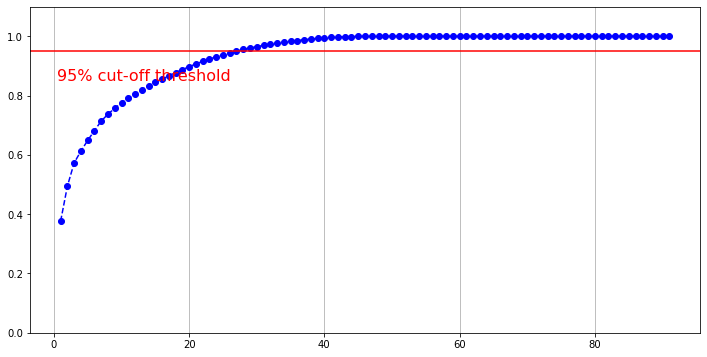

In [12]:
""" 
Using PCA to reduce the dimension of the dataset
"""

X_pca_phone_accel = StandardScaler().fit_transform(X_phone_accel) # normalizing the features
pca = PCA().fit(X_pca_phone_accel)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

pca = PCA(n_components = 28)
pca.fit(x_train_phone_accel)

x_train_pca_phone_accel = pca.transform(x_train_phone_accel)
x_test_pca_phone_accel = pca.transform(x_test_phone_accel)

In [13]:
"""
Fitting the data on Gaussian NB model.
"""
gnb = GaussianNB()
gnb_pca = GaussianNB()
gnb.fit(x_train_phone_accel, y_train_phone_accel)
gnb_pca.fit(x_train_pca_phone_accel, y_train_phone_accel)

y_pred_test = gnb.predict(x_test_phone_accel)
y_pred_test_pca = gnb_pca.predict(x_test_pca_phone_accel)
y_pred_train = gnb.predict(x_train_phone_accel)
y_pred_train_pca = gnb_pca.predict(x_train_pca_phone_accel)

acc_test = accuracy_score(y_test_phone_accel, y_pred_test)
acc_train = accuracy_score(y_train_phone_accel, y_pred_train)
acc_test_pca = accuracy_score(y_test_phone_accel, y_pred_test_pca)
acc_train_pca = accuracy_score(y_train_phone_accel, y_pred_train_pca)

print("Training accuracy non PCA: ", acc_train*100)
print("Testing accuracy non PCA: ", acc_test*100)
print("Training aacuracy PCA: ", acc_train_pca*100)
print("Testing accuracy PCA: ", acc_test_pca*100)


Training accuracy non PCA:  28.13803564656807
Testing accuracy non PCA:  27.648970747562295
Training aacuracy PCA:  38.344439027032884
Testing accuracy PCA:  38.309859154929576


In [15]:
"""
Fitting the data on Logistic regression model
"""
logreg = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial', C = 1, max_iter = 10000, n_jobs = 6)
logreg_pca = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial', C = 1, max_iter = 10000, n_jobs = 6)
logreg.fit(x_train_phone_accel,y_train_phone_accel)
logreg_pca.fit(x_train_pca_phone_accel, y_train_phone_accel)

y_pred_test = logreg.predict(x_test_phone_accel)
y_pred_test_pca = logreg_pca.predict(x_test_pca_phone_accel)
y_pred_train = logreg.predict(x_train_phone_accel)
y_pred_train_pca = logreg_pca.predict(x_train_pca_phone_accel)

acc_test = accuracy_score(y_test_phone_accel, y_pred_test)
acc_train = accuracy_score(y_train_phone_accel, y_pred_train)
acc_test_pca = accuracy_score(y_test_phone_accel, y_pred_test_pca)
acc_train_pca = accuracy_score(y_train_phone_accel, y_pred_train_pca)

print("Training accuracy non PCA: ", acc_train*100)
print("Testing accuracy non PCA: ", acc_test*100)
print("Training aacuracy PCA: ", acc_train_pca*100)
print("Testing accuracy PCA: ", acc_test_pca*100)

In [74]:
"""
Fitting the data on Random forest classifier
"""
clf = RandomForestClassifier(random_state=0, n_jobs = 6)
clf_pca = RandomForestClassifier(random_state=0, n_jobs = 6)
clf.fit(x_train_phone_accel,y_train_phone_accel)
clf_pca.fit(x_train_pca_phone_accel, y_train_phone_accel)

y_pred_test = clf.predict(x_test_phone_accel)
y_pred_test_pca = clf_pca.predict(x_test_pca_phone_accel)
y_pred_train = clf.predict(x_train_phone_accel)
y_pred_train_pca = clf_pca.predict(x_train_pca_phone_accel)

acc_test = accuracy_score(y_test_phone_accel, y_pred_test)
acc_train = accuracy_score(y_train_phone_accel, y_pred_train)
acc_test_pca = accuracy_score(y_test_phone_accel, y_pred_test_pca)
acc_train_pca = accuracy_score(y_train_phone_accel, y_pred_train_pca)

print("Training accuracy non PCA: ", acc_train*100)
print("Testing accuracy non PCA: ", acc_test*100)
print("Training aacuracy PCA: ", acc_train_pca*100)
print("Testing accuracy PCA: ", acc_test_pca*100)

1.0
0.8611050920910076


### hyper opt

In [49]:
space = {
    "n_estimators": hp.quniform("n_estimators", 100, 600, 50),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_split": hp.quniform("min_samples_split", 2, 10, 1),
    "max_features": hp.choice("max_features", ["auto","sqrt","log2"]),
}

In [51]:
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, x_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [57]:
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

  2%|█▎                                                                | 2/100 [00:00<00:06, 15.94trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

  6%|███▉                                                              | 6/100 [00:00<00:05, 16.67trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 10%|██████▌                                                          | 10/100 [00:00<00:05, 17.55trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 12%|███████▊                                                         | 12/100 [00:00<00:05, 15.35trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 16%|██████████▍                                                      | 16/100 [00:00<00:05, 16.38trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 18%|███████████▋                                                     | 18/100 [00:01<00:04, 16.51trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 22%|██████████████▎                                                  | 22/100 [00:01<00:04, 16.84trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 26%|████████████████▉                                                | 26/100 [00:01<00:04, 17.39trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 30%|███████████████████▌                                             | 30/100 [00:01<00:04, 17.29trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 32%|████████████████████▊                                            | 32/100 [00:01<00:03, 17.28trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 36%|███████████████████████▍                                         | 36/100 [00:02<00:03, 17.57trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 40%|██████████████████████████                                       | 40/100 [00:02<00:03, 16.06trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 42%|███████████████████████████▎                                     | 42/100 [00:02<00:03, 15.44trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 46%|█████████████████████████████▉                                   | 46/100 [00:02<00:03, 15.98trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 48%|███████████████████████████████▏                                 | 48/100 [00:02<00:03, 16.32trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 52%|█████████████████████████████████▊                               | 52/100 [00:03<00:02, 17.21trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 56%|████████████████████████████████████▍                            | 56/100 [00:03<00:02, 17.77trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 58%|█████████████████████████████████████▋                           | 58/100 [00:03<00:02, 16.31trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 62%|████████████████████████████████████████▎                        | 62/100 [00:03<00:02, 16.13trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 66%|██████████████████████████████████████████▉                      | 66/100 [00:03<00:02, 16.91trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 68%|████████████████████████████████████████████▏                    | 68/100 [00:04<00:02, 15.81trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 72%|██████████████████████████████████████████████▊                  | 72/100 [00:04<00:01, 15.01trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 74%|████████████████████████████████████████████████                 | 74/100 [00:04<00:01, 14.26trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 76%|█████████████████████████████████████████████████▍               | 76/100 [00:04<00:01, 14.07trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 80%|████████████████████████████████████████████████████             | 80/100 [00:04<00:01, 13.35trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 82%|█████████████████████████████████████████████████████▎           | 82/100 [00:05<00:01, 12.93trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr


 84%|██████████████████████████████████████████████████████▌          | 84/100 [00:05<00:01, 13.22trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 88%|█████████████████████████████████████████████████████████▏       | 88/100 [00:05<00:00, 13.68trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 90%|██████████████████████████████████████████████████████████▌      | 90/100 [00:05<00:00, 13.65trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 94%|█████████████████████████████████████████████████████████████    | 94/100 [00:06<00:00, 13.89trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 96%|██████████████████████████████████████████████████████████████▍  | 96/100 [00:06<00:00, 14.19trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

100%|████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.58trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

AllTrialsFailed: 